<a href="https://colab.research.google.com/github/feniltailor22/Deep_Learning/blob/main/Malarial_cell_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import pandas as pd
from PIL import Image #for resize

In [2]:
image_directory= '/content/drive/MyDrive/cell_images/'

In [3]:
SIZE= 64

In [4]:
dataset= []
label= []

In [5]:
parasitized_img= os.listdir(image_directory+ 'Parasitized/Train/')

In [6]:
for i, image_name in enumerate(parasitized_img):
  if (image_name.split('.')[1]== 'png'):
    image= cv2.imread(image_directory+ 'Parasitized/Train/' + image_name)
    image= Image.fromarray(image, 'RGB')
    image= image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)
    
    #Call PIL.image.fromarray(obj, mode) with obj as a 3-D array and mode as "RGB" to convert obj into an image.

In [7]:
uninfected_img= os.listdir(image_directory+ 'Uninfected/Train/')

In [8]:
for i, image_name in enumerate(uninfected_img):
  if (image_name.split('.')[1]== 'png'):
    image= cv2.imread(image_directory+ 'Uninfected/Train/'+ image_name)
    image= Image.fromarray(image, 'RGB')
    image= image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(1)

In [9]:
#Building the model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

In [11]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= (SIZE, SIZE, 3), activation='relu', padding='same')) #padding='same' means adding outer zeroes.
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(rate= 0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(rate= 0.2))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(rate= 0.2))

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization(axis= -1))
model.add(Dropout(rate= 0.2))

model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0

In [13]:
from sklearn.model_selection import train_test_split

#Applying one-hot encoding to y_train data as Machine cannot understand categories.
from tensorflow.keras.utils import to_categorical

In [14]:
x_train, x_test, y_train, y_test= train_test_split(dataset, to_categorical(np.array(label)), test_size=0.20, random_state=0)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stop= EarlyStopping(monitor='val_loss',patience=5)

In [17]:
model.fit(x=np.array(x_train),
          y=y_train,
          epochs=25,
          batch_size=64,
          validation_split= 0.1,
          verbose=True,
          shuffle= False,
          callbacks=[early_stop]
          )

Epoch 1/25
20/20 [==============================] - 32s 47ms/step - loss: 0.3596 - accuracy: 0.8663 - val_loss: 5.2432 - val_accuracy: 0.5612
Epoch 2/25
20/20 [==============================] - 0s 22ms/step - loss: 0.1799 - accuracy: 0.9376 - val_loss: 0.7755 - val_accuracy: 0.9065
Epoch 3/25
20/20 [==============================] - 0s 21ms/step - loss: 0.1328 - accuracy: 0.9520 - val_loss: 0.7605 - val_accuracy: 0.8561
Epoch 4/25
20/20 [==============================] - 0s 21ms/step - loss: 0.1029 - accuracy: 0.9640 - val_loss: 1.2530 - val_accuracy: 0.6547
Epoch 5/25
20/20 [==============================] - 0s 21ms/step - loss: 0.0971 - accuracy: 0.9688 - val_loss: 0.6697 - val_accuracy: 0.8849
Epoch 6/25
20/20 [==============================] - 0s 22ms/step - loss: 0.0645 - accuracy: 0.9776 - val_loss: 0.4144 - val_accuracy: 0.9065
Epoch 7/25
20/20 [==============================] - 0s 21ms/step - loss: 0.0521 - accuracy: 0.9856 - val_loss: 0.4691 - val_accuracy: 0.8777
Epoch 8/25
2

In [18]:
losses= pd.DataFrame(data=model.history.history)

In [19]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.359597,0.866293,5.243157,0.561151
1,0.179882,0.937550,0.775544,0.906475
2,0.132771,0.951962,0.760496,0.856115
3,0.102910,0.963971,1.252985,0.654676
4,0.097058,0.968775,0.669738,0.884892


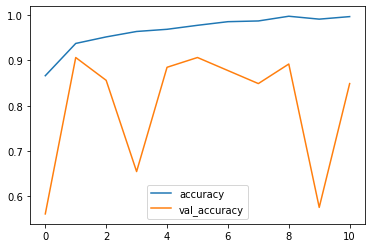

In [20]:
losses[['accuracy','val_accuracy']].plot()

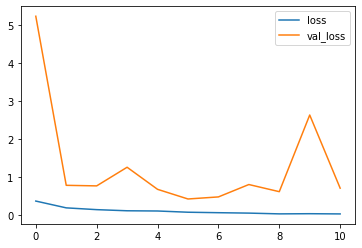

In [21]:
losses[['loss','val_loss']].plot()

In [22]:
model.evaluate(np.array(x_test), np.array(y_test))

11/11 [==============================] - 0s 11ms/step - loss: 0.7604 - accuracy: 0.8329


[0.7603534460067749, 0.8328530192375183]